### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
import matplotlib.style as style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

style.use('seaborn-poster')
style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'serif'

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (8, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

C:\Users\Acer\AppData\Local\Temp\ipykernel_15672\3225284547.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


# 1. Data Preparation

In [2]:
walmart = pd.read_csv('features.csv')

In [3]:
walmart.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [4]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = (df.Date.dt.isocalendar().week)*1.0   
    
split_date(walmart) 

In [5]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  Year          8190 non-null   int64         
 13  Month         8190 non-null   int64         
 14  Day           8190 non-null   int64         
 15  WeekOfYear    8190 non-null   Float64 

Most of the columns in the data are numeric columns except the IsHoliday which is of boolean type and Type represents an object

In [6]:
walmart.describe().T

count         mean           std       min          25%  \
Store         8190.0    23.000000     12.987966     1.000    12.000000   
Temperature   8190.0    59.356198     18.678607    -7.290    45.902500   
Fuel_Price    8190.0     3.405992      0.431337     2.472     3.041000   
MarkDown1     4032.0  7032.371786   9262.747448 -2781.450  1577.532500   
MarkDown2     2921.0  3384.176594   8793.583016  -265.760    68.880000   
MarkDown3     3613.0  1760.100180  11276.462208  -179.260     6.600000   
MarkDown4     3464.0  3292.935886   6792.329861     0.220   304.687500   
MarkDown5     4050.0  4132.216422  13086.690278  -185.170  1440.827500   
CPI           7605.0   172.460809     39.738346   126.064   132.364839   
Unemployment  7605.0     7.826821      1.877259     3.684     6.634000   
Year          8190.0  2011.351648      1.041762  2010.000  2010.000000   
Month         8190.0     6.291209      3.328046     1.000     3.000000   
Day           8190.0    15.659341      8.775775     1.000     8.000000   
WeekOfYear    8190.0    25.214286     14.527604     1.000    13.000000   

                      50%          75%            max  
Store           23.000000    34.000000      45.000000  
Temperature     60.710000    73.880000     101.950000  
Fuel_Price       3.513000     3.743000       4.468000  
MarkDown1     4743.580000  8923.310000  103184.980000  
MarkDown2      364.570000  2153.350000  104519.540000  
MarkDown3       36.260000   163.150000  149483.310000  
MarkDown4     1176.425000  3310.007500   67474.850000  
MarkDown5     2727.135000  4832.555000  771448.100000  
CPI            182.764003   213.932412     228.976456  
Unemployment     7.806000     8.567000      14.313000  
Year          2011.000000  2012.000000    2013.000000  
Month            6.000000     9.000000      12.000000  
Day             16.000000    23.000000      31.000000  
WeekOfYear      24.000000    37.000000      52.000000

In [7]:
walmart.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
Year               0
Month              0
Day                0
WeekOfYear         0
dtype: int64

<AxesSubplot: >

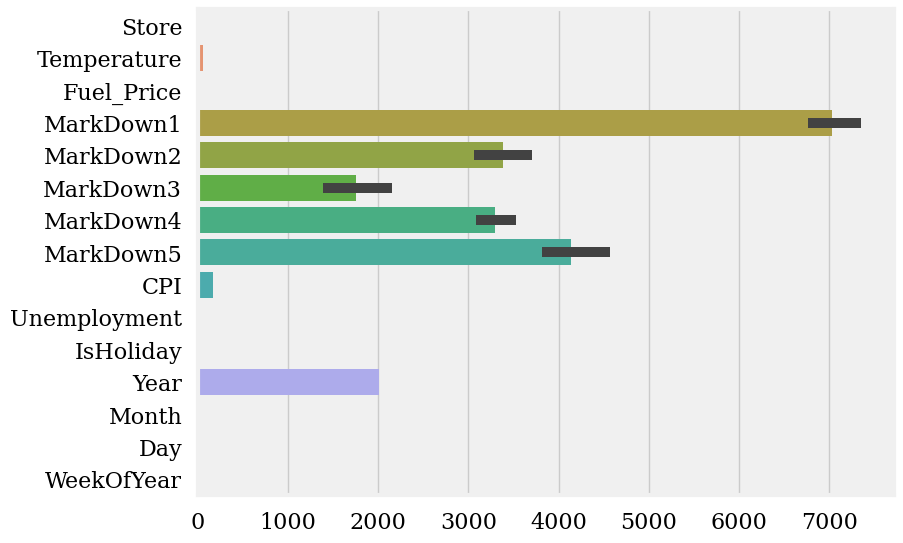

In [8]:
sns.barplot(walmart,orient="h")

# 2. Exploratory Data Analysis

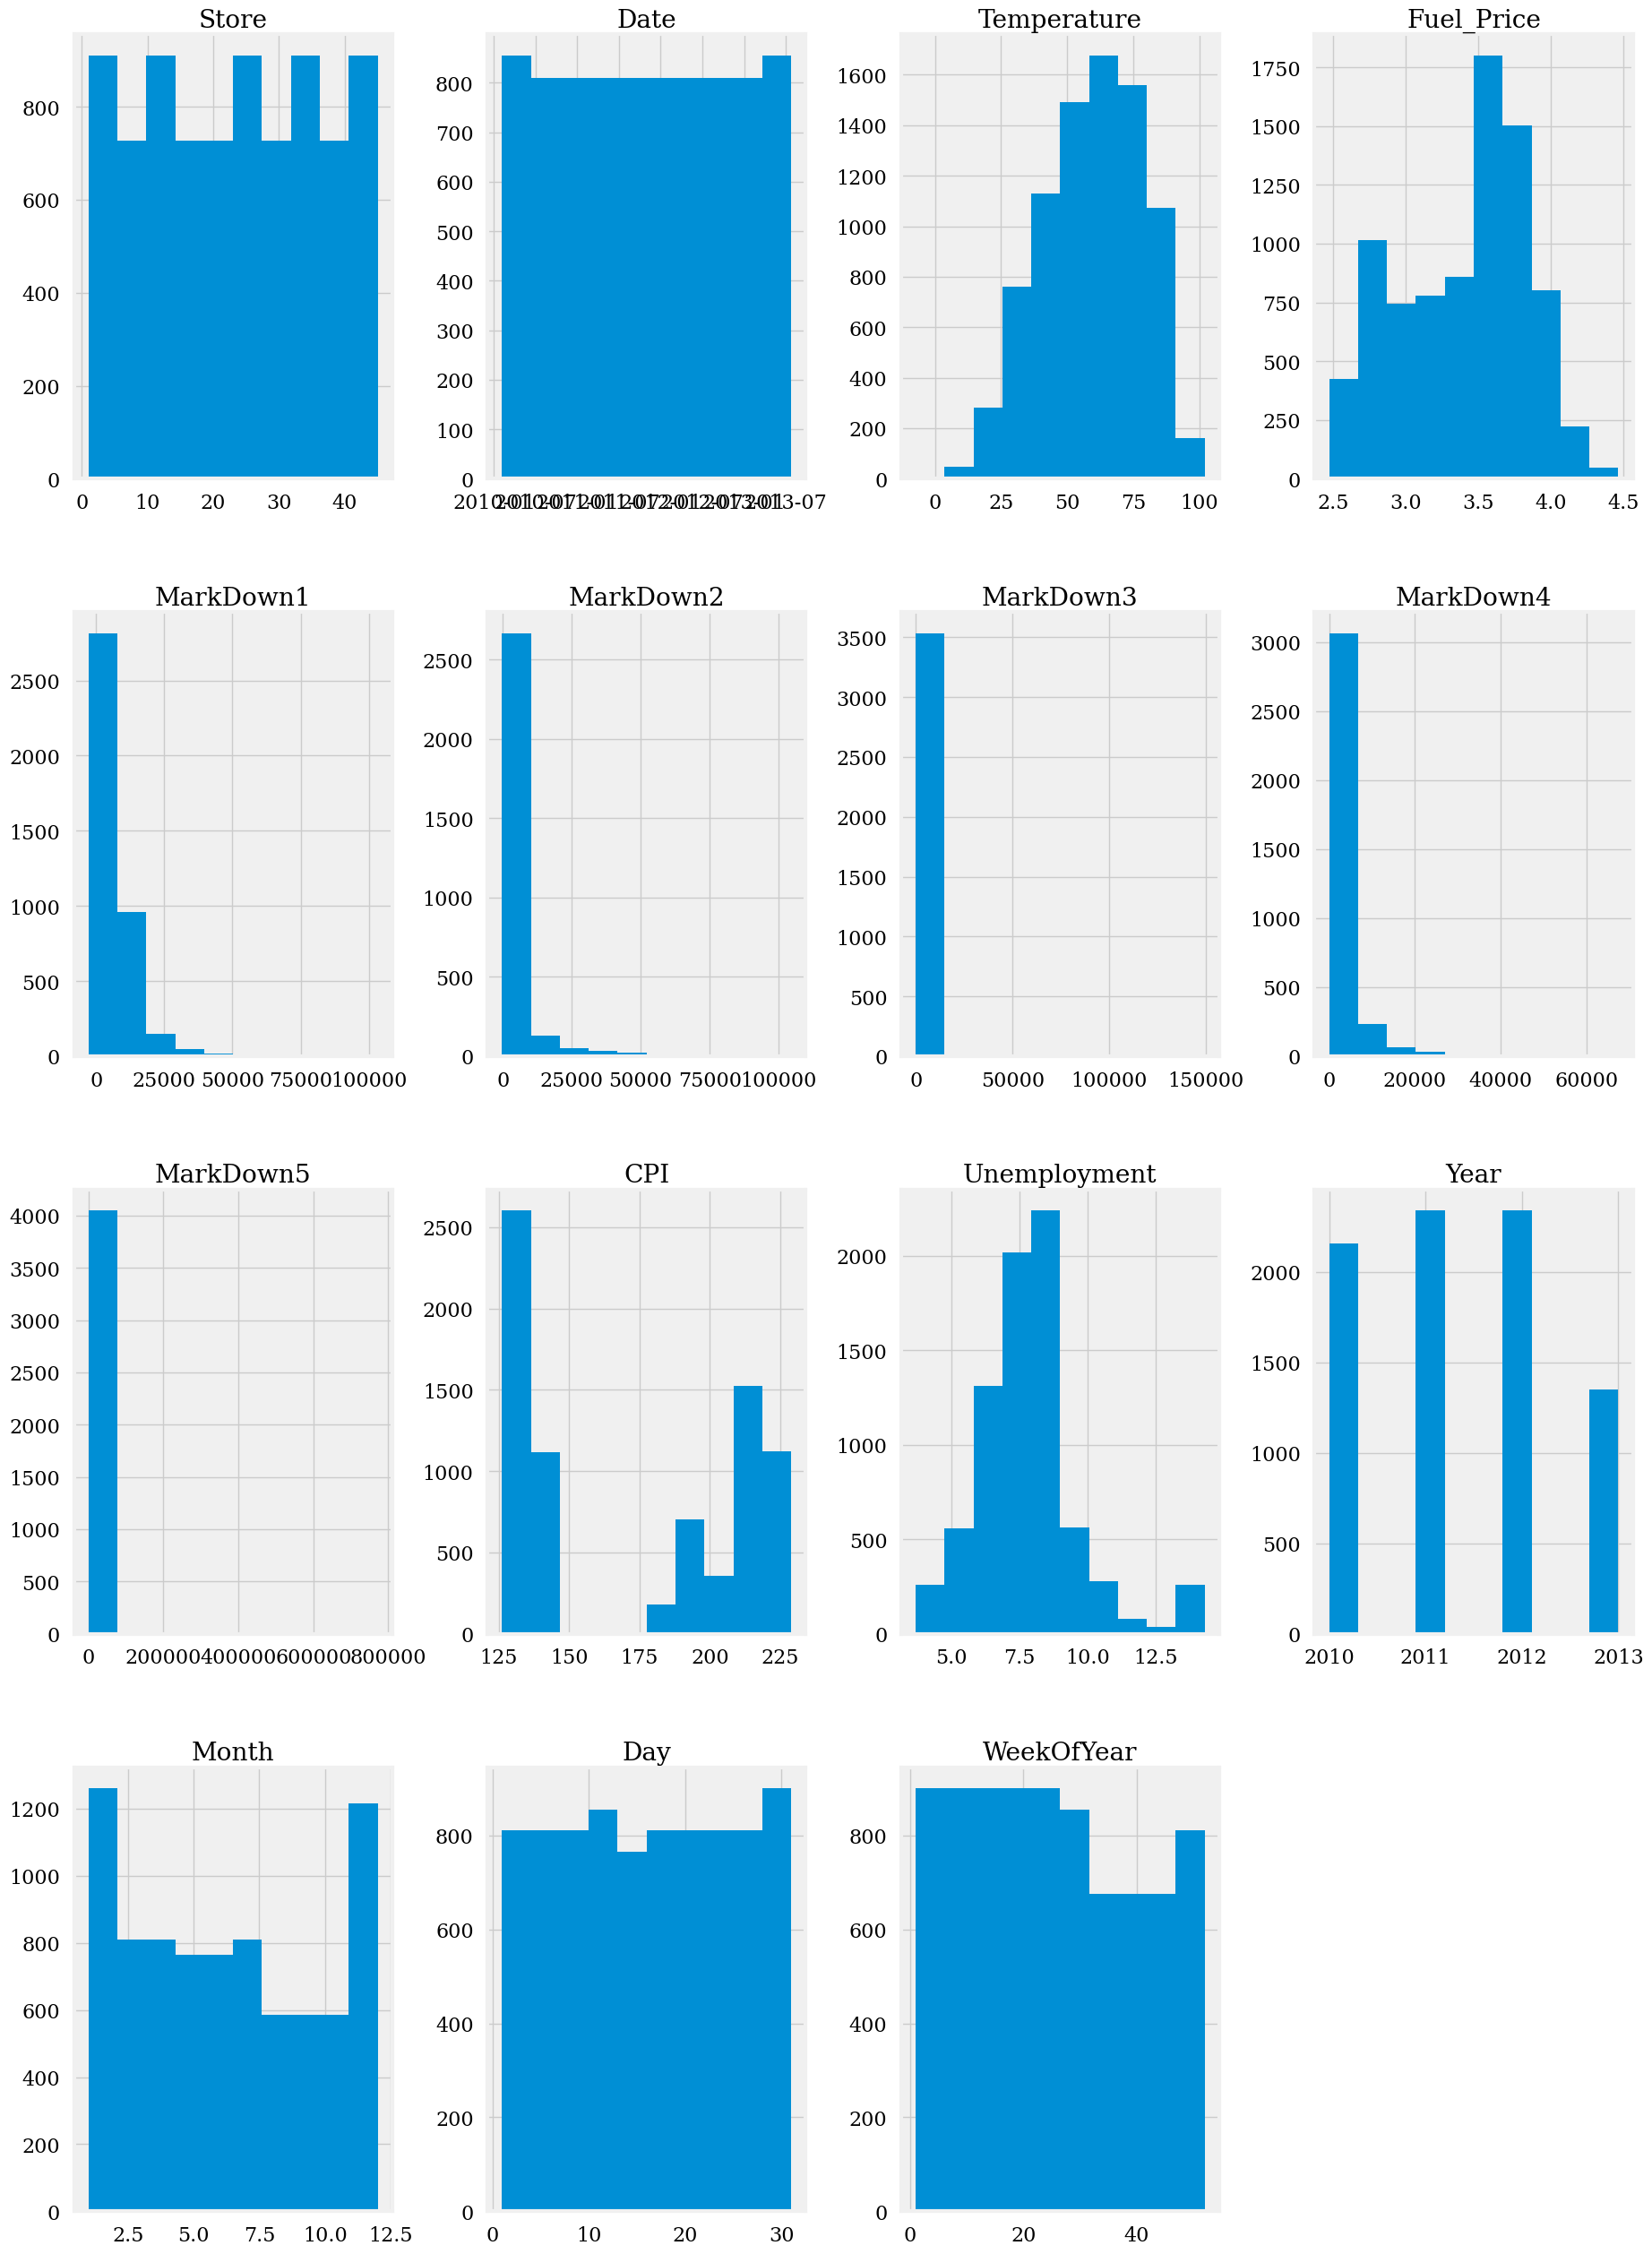

In [9]:
walmart.hist(figsize=(20,30))
plt.show()

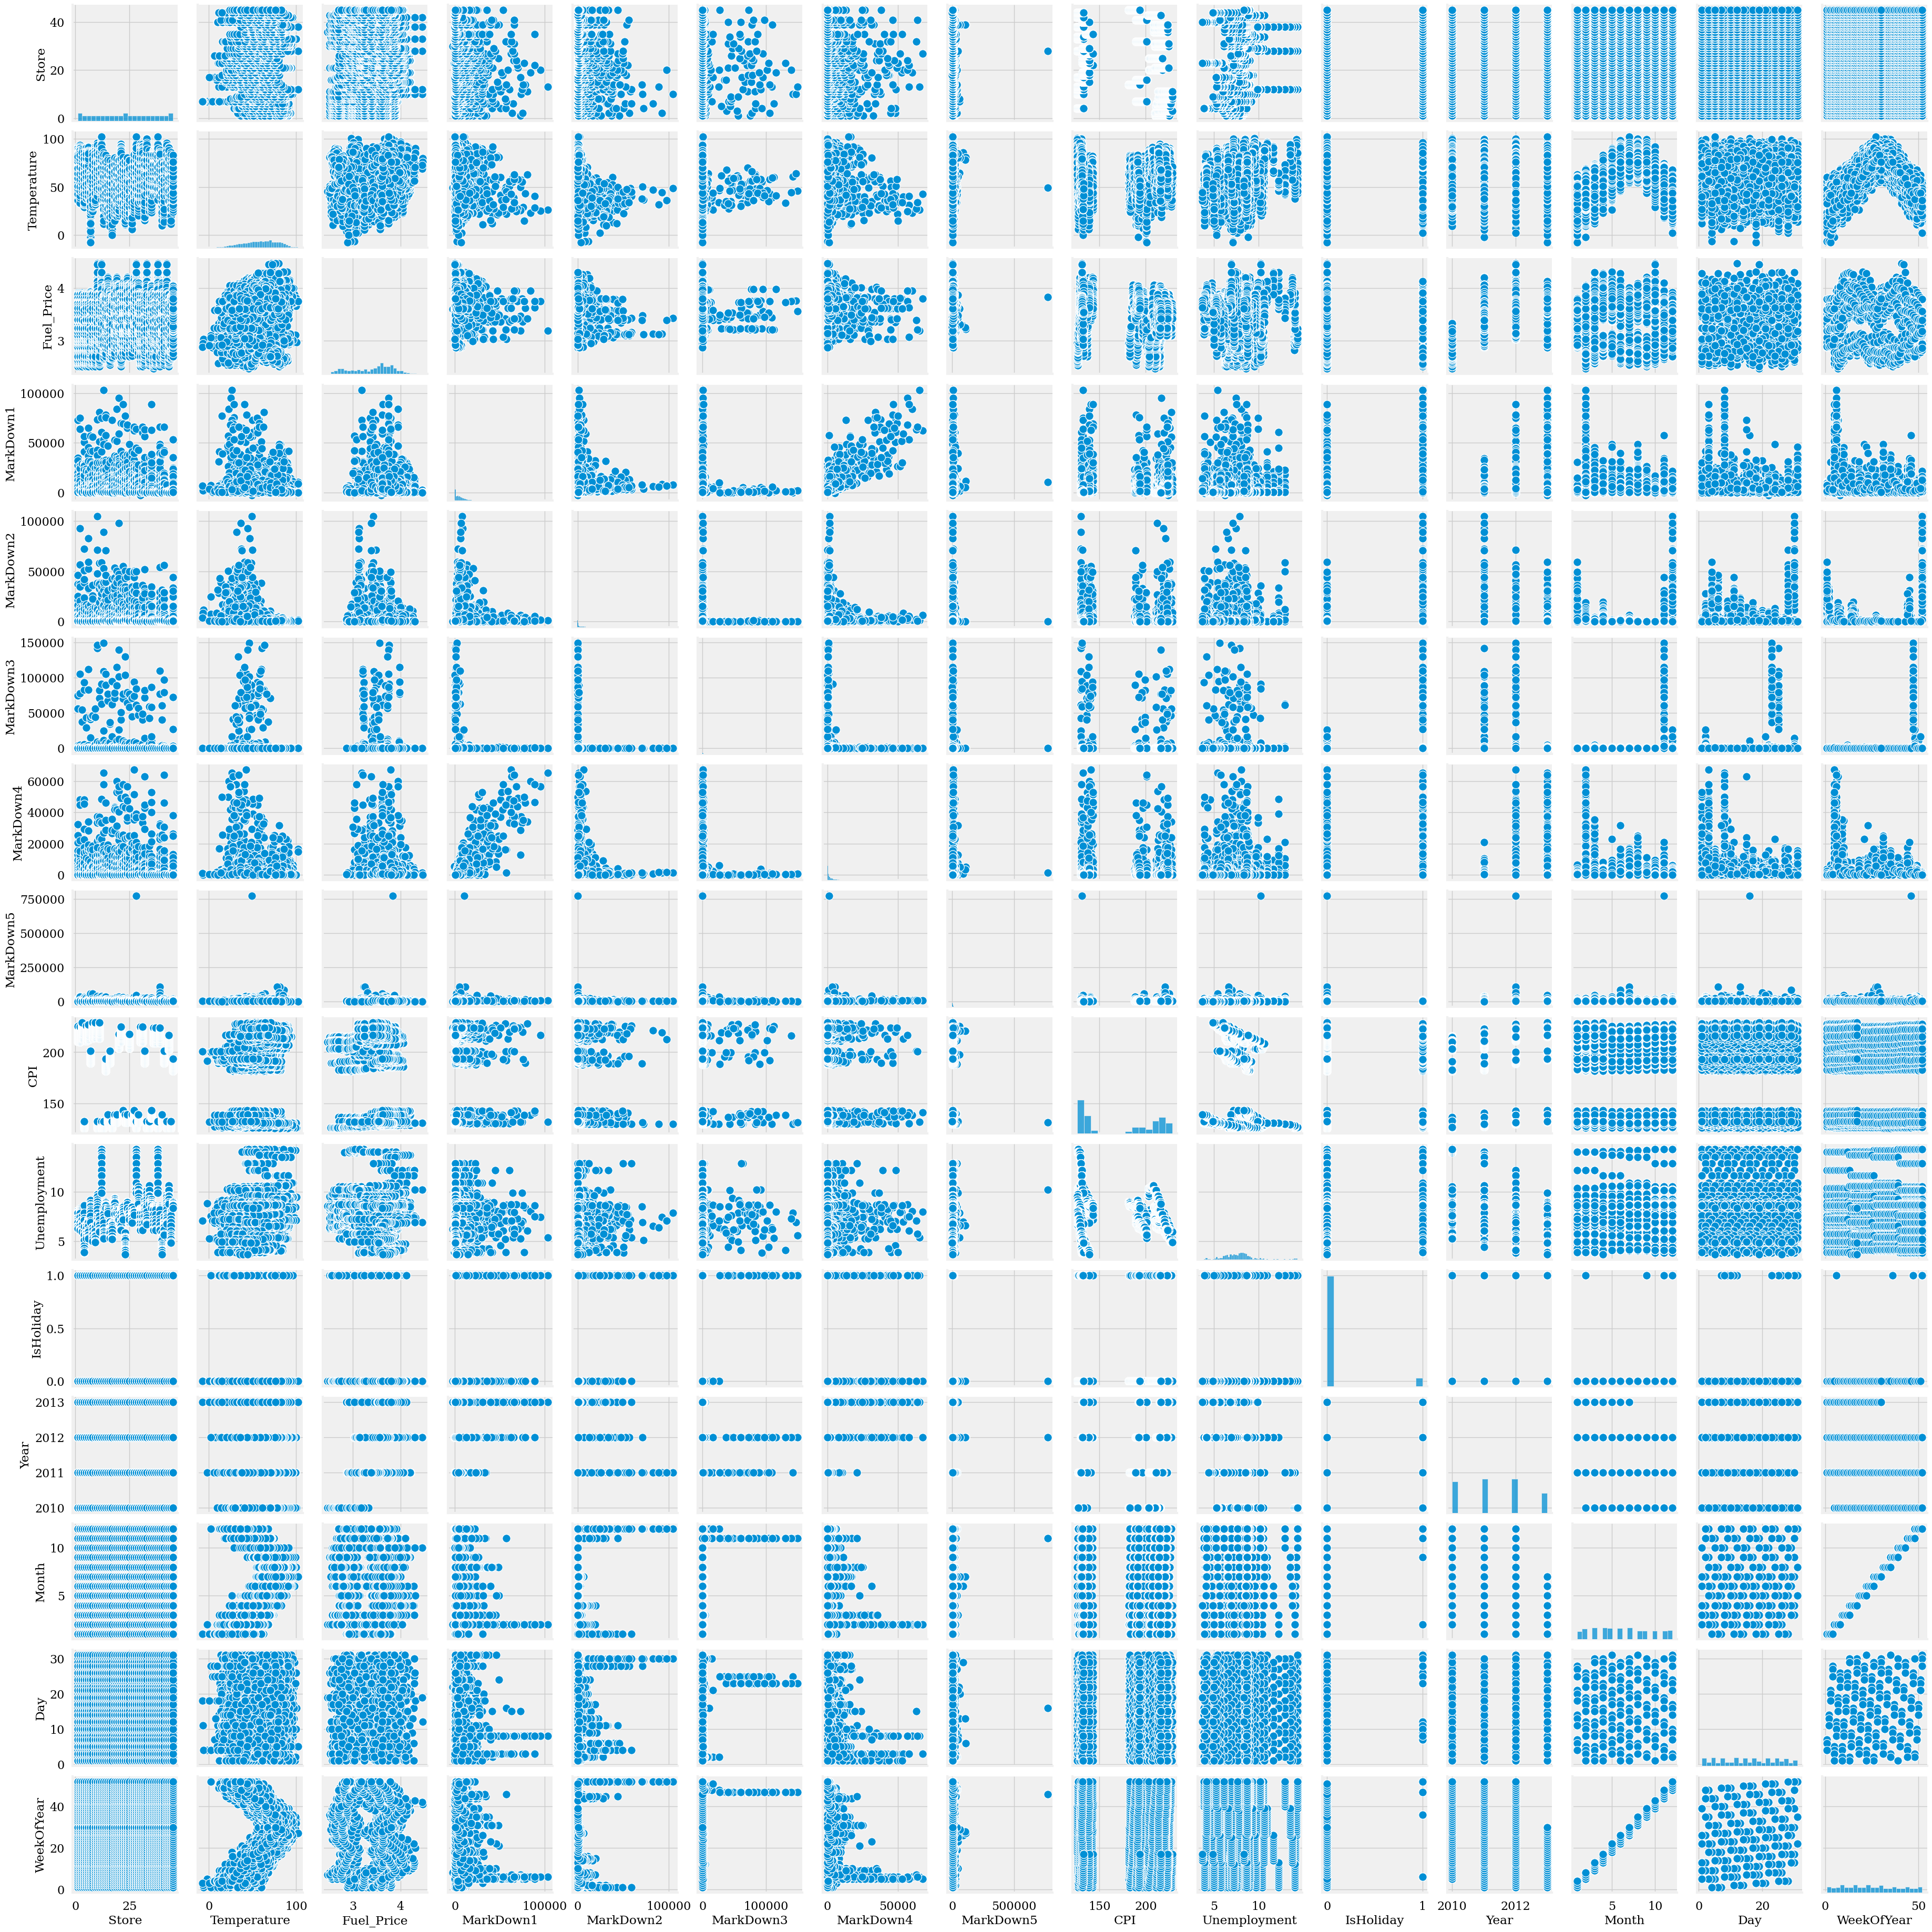

In [10]:
sns.pairplot(walmart)

Its shows correlation between the daatsets

<AxesSubplot: xlabel='IsHoliday', ylabel='count'>

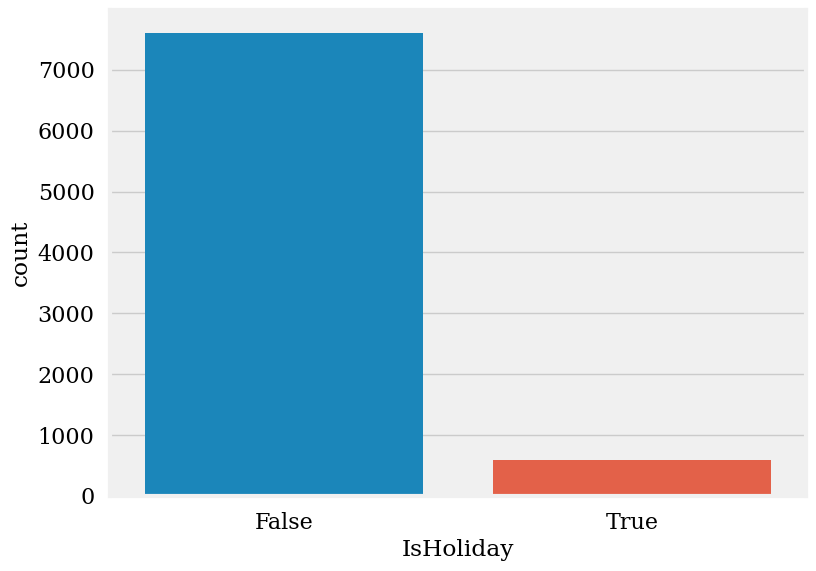

In [11]:
sns.countplot(data=walmart,x="IsHoliday")

Total count of Holidays in Trur or False

<AxesSubplot: xlabel='Year', ylabel='count'>

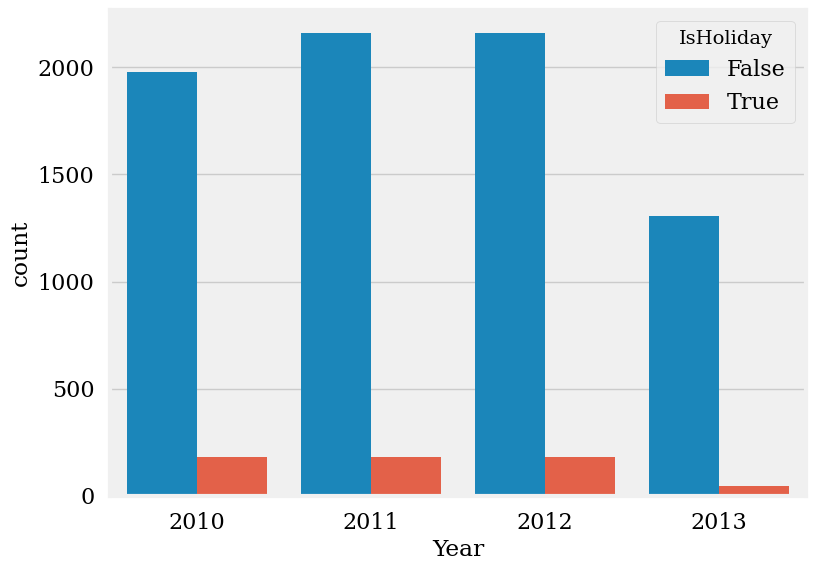

In [12]:
sns.countplot(data=walmart,x='Year',hue="IsHoliday")

Year wise Distribution of Holidays

<AxesSubplot: xlabel='MarkDown3', ylabel='WeekOfYear'>

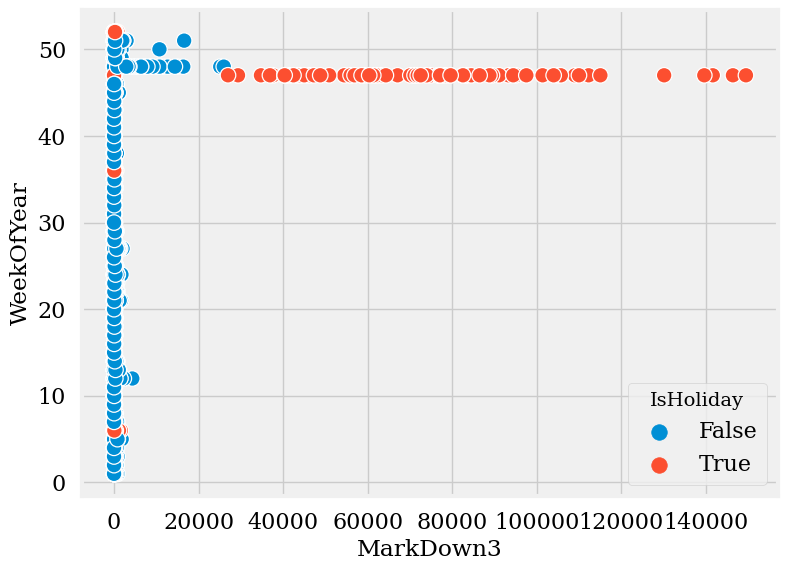

In [13]:
sns.scatterplot(data=walmart,x='MarkDown3',y='WeekOfYear',hue='IsHoliday')

In [14]:
# walmart.hist(figsize=(20,30))
# plt.show()
# sns.pairplot(walmart)
# pltt.show()
# sns.countplot(data=walmart,x="IsHoliday")
# plt.show()
# sns.countplot(data=walmart,x='Year',hue="IsHoliday")
# plt.show()
# sns.scatterplot(data=walmart,x='MarkDown3',y='WeekOfYear',hue='IsHoliday')
# plt.show()
# sns.scatterplot(data=walmart,x='MarkDown1',y='MarkDown4',hue='IsHoliday')
# plt.show()
# sns.scatterplot(data=walmart,x='Year',y='Fuel_Price',hue='IsHoliday')
# plt.figure(figsize=(20,12))
# sns.heatmap(walmart[~walmart.isnull()].corr(),annot=True,cmap="YlGnBu")
# plt.show()

<AxesSubplot: xlabel='MarkDown1', ylabel='MarkDown4'>

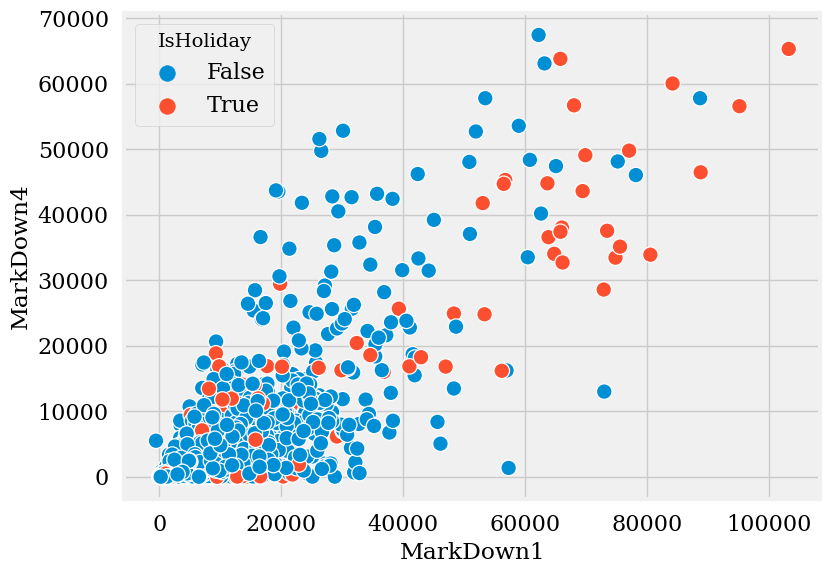

In [15]:
sns.scatterplot(data=walmart,x='MarkDown1',y='MarkDown4',hue='IsHoliday')

<AxesSubplot: xlabel='Year', ylabel='Fuel_Price'>

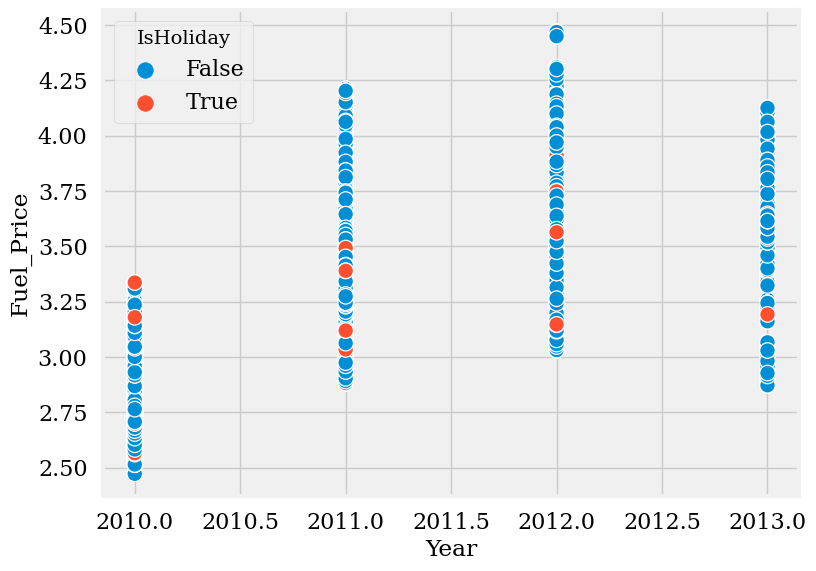

In [16]:
sns.scatterplot(data=walmart,x='Year',y='Fuel_Price',hue='IsHoliday')

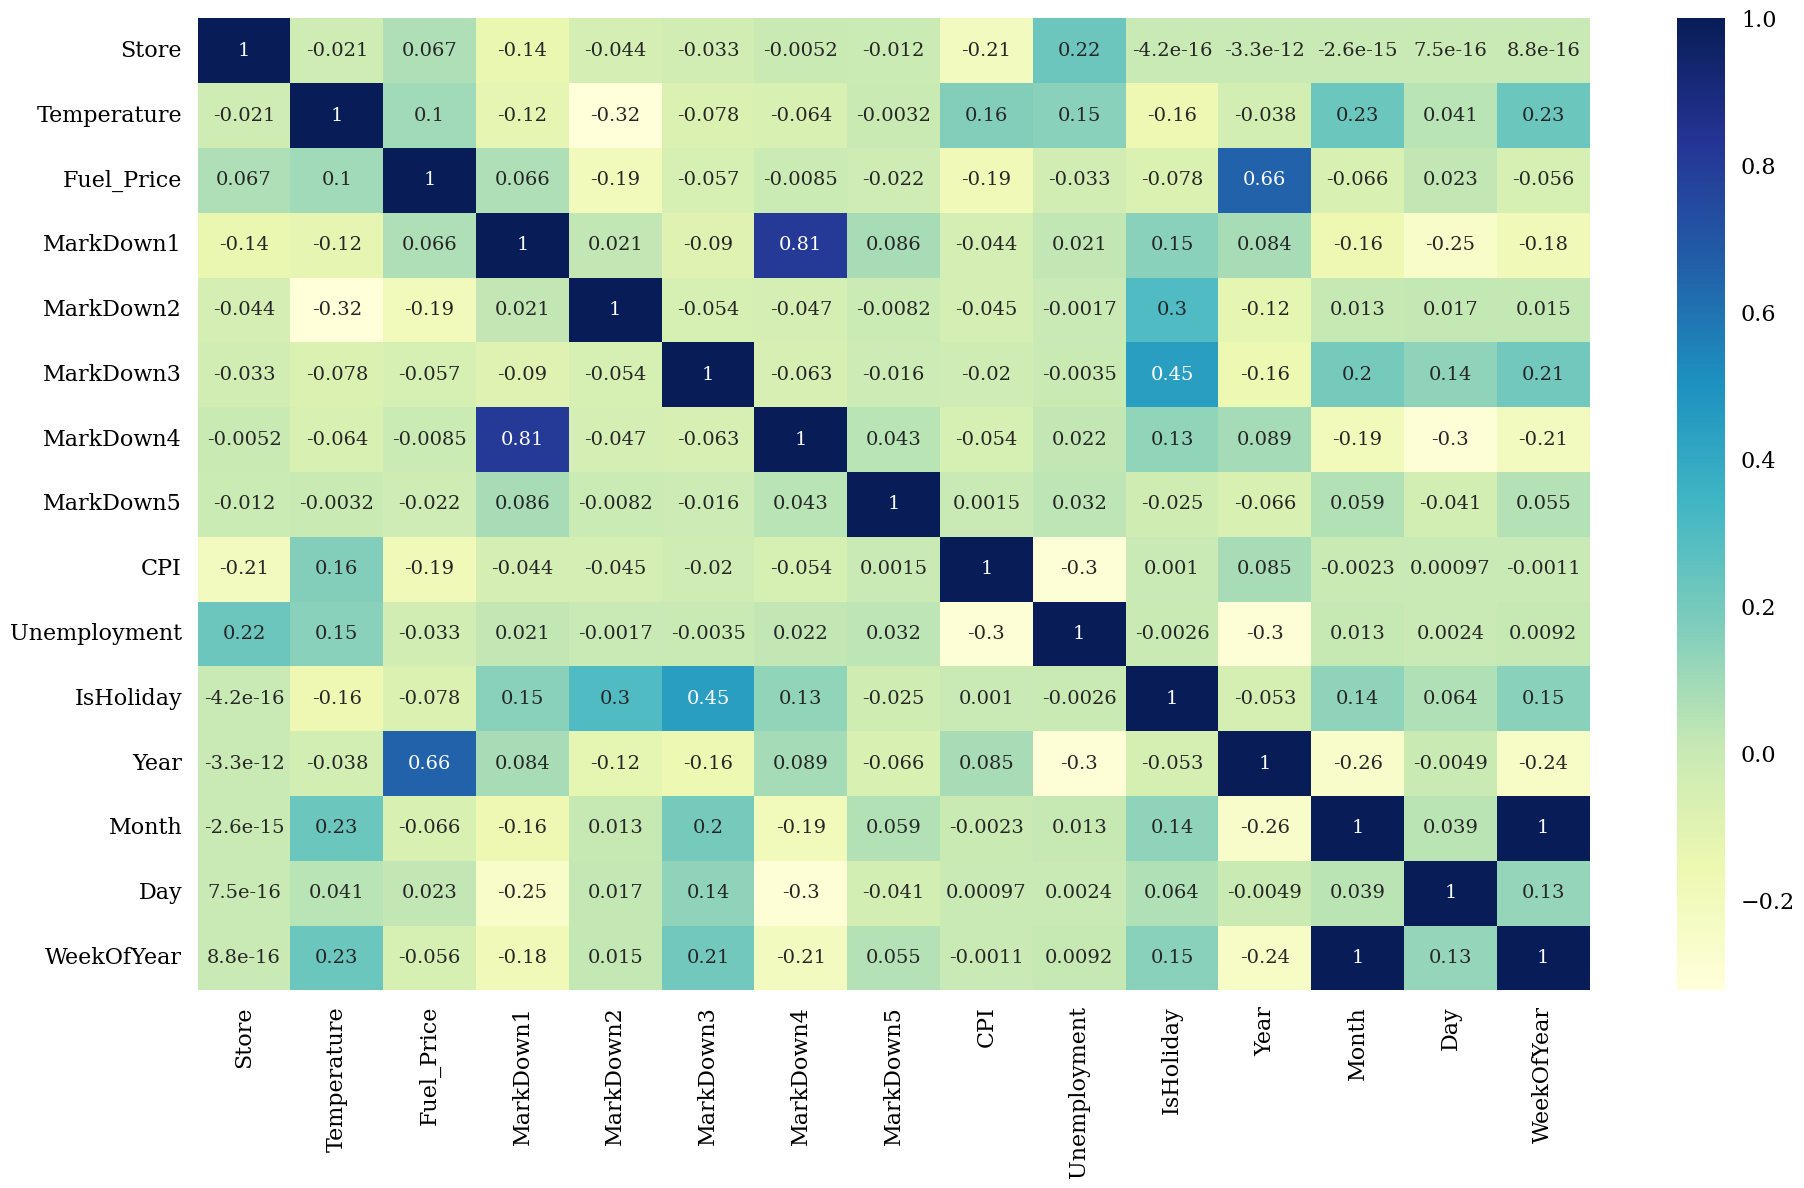

In [17]:
plt.figure(figsize=(20,12))
sns.heatmap(walmart[~walmart.isnull()].corr(),annot=True,cmap="YlGnBu")
plt.show()

***Insights:***

- Markdown1-5 have very weak correlation with the weekly sales, so we will leave these columns out 


- Temperature. Fuel price, CPI and Unemployment are very weakly coorelated with the weekly sales, so these columns will also be dropped out 


- IsHoliday will be considered for the further analysis as the sales in the holiday weeks are higher than in the non-holiday weeks


- We will also leave out Month and Day as this information is already contained in the WeekOfYear

- Its shows correlation between the daatsets
- Strong Correlation :-
- Markdown 3 - Isholiday - 0.45
- year - Fuel_Price - 0.66
- Markdown1 - Markdown4 = 0.81



### 3.Filling Missing Values

In [18]:
miss_col  = [ 'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment']
for i in miss_col:
    median = walmart[i].median()
    walmart[i].fillna(median,inplace=True) 

In [19]:
walmart.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Year', 'Month', 'Day', 'WeekOfYear'],
      dtype='object')

### 4. Data Encoding

In [20]:
walmart.drop("Date",1,inplace=True)

In [21]:
walmart.IsHoliday.replace([False,  True],[0,1],inplace=True)

In [22]:
walmart.Year.replace([2010, 2011, 2012, 2013],["2010", "2011", "2012", "2013"],inplace=True)

In [23]:
walmart = pd.concat([walmart,pd.get_dummies(walmart.Year)],1)
walmart.drop("Year",1,inplace=True)

In [24]:
walmart.Month.unique()
walmart.Month.replace([i for i in range(1,12)],[str(i) for i in range(1,12)],inplace=True)
walmart = pd.concat([walmart,pd.get_dummies(walmart.Month)],1)
walmart.drop("Month",1,inplace=True)

In [25]:
X = walmart.drop("IsHoliday",1)
y = walmart.IsHoliday

In [26]:
encol  = X.columns[:12]
nonencol  = X.columns[12:]
encol,nonencol

(Index(['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
        'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Day',
        'WeekOfYear'],
       dtype='object'),
 Index(['2010', '2011', '2012', '2013',     12,    '1',   '10',   '11',    '2',
           '3',    '4',    '5',    '6',    '7',    '8',    '9'],
       dtype='object'))

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(walmart[encol])

In [28]:
X = pd.concat([pd.DataFrame(x,columns=encol),walmart[nonencol]],1)

#### Split data in train and test in ration 7:3

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### performance measuring function

In [30]:
def evaluate(name,pred,pred_tr):
    print("train accuracy of ",name,":",accuracy_score(y_train,pred_tr))
    print("test accuracy of ",name,":",accuracy_score(y_test,pred_lg))
    print("Confusion Matrix : \n",confusion_matrix(y_test,pred_lg))

### 5. Model Training

### Logistic Regrssion

In [31]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
pred_lg = lg.predict(X_test)
pred_lg_tr = lg.predict(X_train)
evaluate("Logistic Regreesion",pred_lg,pred_lg_tr)

train accuracy of  Logistic Regreesion : 0.9408686551543695
test accuracy of  Logistic Regreesion : 0.9442409442409443
Confusion Matrix : 
 [[2282    0]
 [ 137   38]]


### Decision Tree

In [32]:
dt = DecisionTreeClassifier()

In [33]:
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
dt_pred_tr = dt.predict(X_train)
evaluate("Decision Tree",dt_pred,dt_pred_tr)

train accuracy of  Decision Tree : 1.0
test accuracy of  Decision Tree : 0.9442409442409443
Confusion Matrix : 
 [[2282    0]
 [ 137   38]]


### Random Forest

In [34]:
rdf = RandomForestClassifier()
rdf.fit(X_train,y_train)
rdf_pred = rdf.predict(X_test)
rdf_pred_tr = rdf.predict(X_train)
print("train accuracy :",accuracy_score(y_test,rdf_pred))
print("test accuracy :",accuracy_score(y_train,rdf_pred_tr))
print("Confusion Matrix : \n",confusion_matrix(y_test,rdf_pred))

train accuracy : 0.9995929995929996
test accuracy : 1.0
Confusion Matrix : 
 [[2282    0]
 [   1  174]]


### XG Boost 

In [35]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
xg_pred = xg.predict(X_test)
xg_pred_tr = xg.predict(X_train)
print("train accuracy :",accuracy_score(y_test,xg_pred))
print("test accuracy :",accuracy_score(y_train,xg_pred_tr))
print("Confusion Matrix : \n",confusion_matrix(y_test,xg_pred))

train accuracy : 1.0
test accuracy : 1.0
Confusion Matrix : 
 [[2282    0]
 [   0  175]]


### Random Forest and Xg bost get 100 % Accuracy

### Final Model

In [36]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
xg_pred = xg.predict(X_test)
xg_pred_tr = xg.predict(X_train)
print("train accuracy :",accuracy_score(y_test,xg_pred))
print("test accuracy :",accuracy_score(y_train,xg_pred_tr))
print("Confusion Matrix : \n",confusion_matrix(y_test,xg_pred))

train accuracy : 1.0
test accuracy : 1.0
Confusion Matrix : 
 [[2282    0]
 [   0  175]]
